In [ ]:
import numpy as np 
import cv2

In [ ]:

X = np.load('dataX.npy')
Y = np.load('dataY.npy')
print(X.shape)
X=X.reshape(4072,100*100*3)
X.shape

(4072, 100, 100, 3)


(4072, 30000)

In [ ]:
print(Y.shape)
Y

(4072, 3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

C:\Users\Amar kumar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


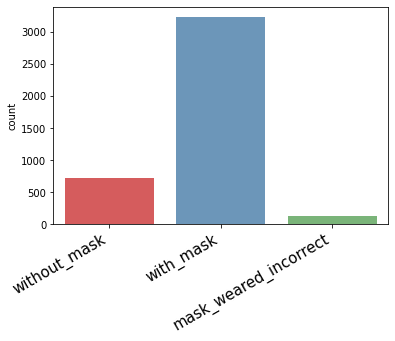

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(np.argmax(Y, axis=1), palette="Set1", alpha=0.8)
ax.set_xticklabels(['without_mask', 'with_mask', 'mask_weared_incorrect'], rotation=30, ha="right", fontsize=15)
plt.show()

In [ ]:
X = X / 255

In [ ]:
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
y_train=y_train.astype(int)
y_train2=[]
for i in  range(y_train.shape[0]):
  
    if y_train[i][0]==1 and y_train[i][1]==0 and y_train[i][2]==0:
        y_train2.append(1)
    if y_train[i][0]==0 and y_train[i][1]==1 and y_train[i][2]==0:
        y_train2.append(2)
    if y_train[i][0]==0 and y_train[i][1]==0 and y_train[i][2]==1:
        y_train2.append(3)
    

In [ ]:
y_train = np.array(y_train2)
y_train.shape

(3257,)

In [ ]:
y_test=y_test.astype(int)
y_test2=[]
for i in  range(y_test.shape[0]):
  
    if y_test[i][0]==1 and y_test[i][1]==0 and y_test[i][2]==0:
        y_test2.append(1)
    if y_test[i][0]==0 and y_test[i][1]==1 and y_test[i][2]==0:
        y_test2.append(2)
    if y_test[i][0]==0 and y_test[i][1]==0 and y_test[i][2]==1:
        y_test2.append(3)
    

In [ ]:
from sklearn.svm import SVC 
svc = SVC()
print(x_train.shape)
print(y_train.shape)
svc.fit(x_train,y_train)
print(x_train.shape)

(3257, 30000)
(3257,)
(3257, 30000)


In [ ]:
y_pred=svc.predict(x_test)

In [ ]:

y_test = np.array(y_test2)
#print(y_test)
y_train.shape
accuracy_score(y_test, y_pred)

0.9361963190184049